In [1]:
import numpy as np
import tensorflow as tf


In [2]:
import cv2

In [50]:
inp= tf.keras.Input(shape=(100,100,3))
cv1=tf.keras.layers.Conv2D(8,(3,3),activation='relu')(inp)
pool1=tf.keras.layers.MaxPool2D((2,2))(cv1)
cv2=tf.keras.layers.Conv2D(8,(3,3),activation='relu')(pool1)
pool2=tf.keras.layers.MaxPool2D((2,2))(cv2)
cv3=tf.keras.layers.Conv2D(8,(3,3),activation='relu')(pool2)
flat=tf.keras.layers.Flatten()(cv3)
dense1=tf.keras.layers.Dense(100,activation='relu')(flat)
dense2=tf.keras.layers.Dense(50,activation='sigmoid')(dense1)
dense3=tf.keras.layers.Dense(1,activation='sigmoid')(dense2)

mask= tf.keras.Model(inputs=inp, outputs=dense3)

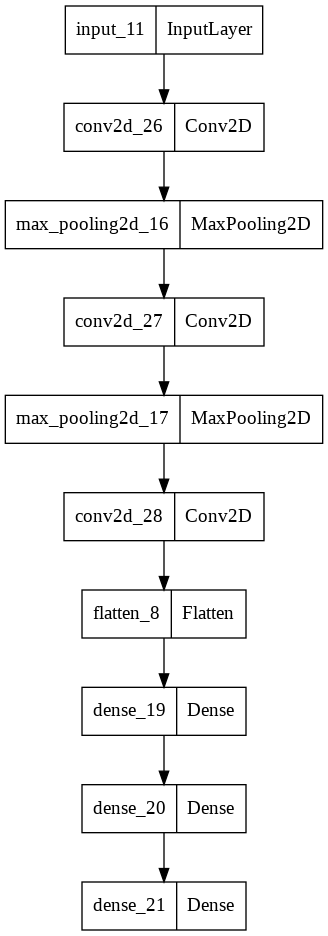

In [51]:
tf.keras.utils.plot_model(mask, "my_first_model.png")

In [52]:
mask.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_26 (Conv2D)          (None, 98, 98, 8)         224       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 49, 49, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 47, 47, 8)         584       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 23, 23, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 21, 21, 8)         584 

In [53]:
mask.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [54]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [55]:
import os
os.chdir("/content/drive/MyDrive/fmask")
training_set = train_datagen.flow_from_directory('train',target_size=(100,100),batch_size=10 ,class_mode='binary')
test_set = test_datagen.flow_from_directory('test',target_size=(100,100),batch_size=10,class_mode='binary')

Found 1315 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [56]:
mask.fit(training_set,epochs=20)

Epoch 1/20
132/132 [==============================] - 16s 117ms/step - loss: 0.5565 - accuracy: 0.6958
Epoch 2/20
132/132 [==============================] - 15s 114ms/step - loss: 0.1773 - accuracy: 0.9399
Epoch 3/20
132/132 [==============================] - 15s 113ms/step - loss: 0.1120 - accuracy: 0.9635
Epoch 4/20
132/132 [==============================] - 15s 112ms/step - loss: 0.0787 - accuracy: 0.9726
Epoch 5/20
132/132 [==============================] - 16s 121ms/step - loss: 0.0633 - accuracy: 0.9779
Epoch 6/20
132/132 [==============================] - 15s 113ms/step - loss: 0.0504 - accuracy: 0.9856
Epoch 7/20
132/132 [==============================] - 15s 115ms/step - loss: 0.0505 - accuracy: 0.9787
Epoch 8/20
132/132 [==============================] - 15s 114ms/step - loss: 0.0216 - accuracy: 0.9932
Epoch 9/20
132/132 [==============================] - 15s 113ms/step - loss: 0.0240 - accuracy: 0.9916
Epoch 10/20
132/132 [==============================] - 15s 114ms/step - l

In [62]:
image = tf.keras.utils.load_img(r"/content/drive/MyDrive/fmask/test/without_mask/310.jpg",target_size=(100,100,3))
input_arr = tf.keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = mask.predict(input_arr)
print(predictions)

1/1 [==============================] - 0s 30ms/step
[[0.9994257]]


In [63]:
loss, acc = mask.evaluate(test_set, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

20/20 - 62s - loss: 0.1909 - accuracy: 0.9536 - 62s/epoch - 3s/step
Untrained model, accuracy: 95.36%


In [65]:
# mask.save('/content/drive/MyDrive/fmask/my_model.h5')
mask.save('/content/drive/MyDrive/fmask/model')
